<a href="https://colab.research.google.com/github/doo52oh/Dacon/blob/main/%EC%9E%A1%EC%BC%80%EC%96%B4%EC%B6%94%EC%B2%9C/%EC%9E%A1%EC%BC%80%EC%96%B4%EC%B6%94%EC%B2%9C%EC%95%8C%EA%B3%A0%EB%A6%AC%EC%A6%98%EA%B2%BD%EC%A7%84%EB%8C%80%ED%9A%8C_EDA_%EB%8D%B0%EC%9D%B4%ED%84%B0%EB%B3%80%EA%B2%BD.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 잡케어 추천 알고리즘 EDA

참조 : [My EDA - 모두다 그리자 :D](https://dacon.io/codeshare/3895) 

# Data
* d_l_match_yn :  속성 D 대분류 매칭 여부
* d_m_match_yn :  속성 D  세분류 매칭 여부
* d_s_match_yn :  속성 D  코드 매칭 여부
* h_l_match_yn :  속성 H 대분류 매칭 여부
* h_m_match_yn :  속성 H 중분류 매칭 여부
* h_s_match_yn :  속성 H 코드 매칭 여부 


* person_attribute_a :  회원 속성 A
* person_attribute_a_1 :  회원 속성 A 하위 속성 1
* person_attribute_b :  회원 속성 B


* person_prefer_c :  회원 선호 속성 C
* person_prefer_d_1 :  회원 선호 속성 D 1번
* person_prefer_d_2 :  회원 선호 속성 D 2번
* person_prefer_d_3 :  회원 선호 속성 D 3번
* person_prefer_e :  회원 선호 속성 E
* person_prefer_f :  회원 선호 속성 F
* person_prefer_g :  회원 선호 속성 G
* person_prefer_h_1 :  회원 선호 속성 H 1번
* person_prefer_h_2 :  회원 선호 속성 H 2번
* person_prefer_h_3 :  회원 선호 속성 H 3번


* contents_attribute_i :  컨텐츠 속성 I
* contents_attribute_a :  컨텐츠 속성 A
* contents_attribute_j_1 :  컨텐츠 속성 J 하위 속성 1
* contents_attribute_j :  컨텐츠 속성 J
* contents_attribute_c :  컨텐츠 속성 C
* contents_attribute_k :  컨텐츠 속성 K
* contents_attribute_l :  컨텐츠 속성 L
* contents_attribute_d :  컨텐츠 속성 D
* contents_attribute_m :  컨텐츠 속성 M
* contents_attribute_e :  컨텐츠 속성 E
* contents_attribute_h :  컨텐츠 속성 H


* person_rn :  사용자번호
* contents_rn :  컨텐츠번호
* contents_open_dt :  컨텐츠 열람 일시


* target :  컨텐츠 사용 여부 (라벨)  
'1' : 해당 회원이 컨텐츠를 사용함  
'0' : 해당 회원이 컨텐츠를 사용하지 않

In [1]:
from google.colab import drive
from typing import Dict

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings

from datetime import datetime

plt.style.use('fivethirtyeight')
sns.set_theme(style="whitegrid")
warnings.filterwarnings('ignore')

drive.mount("/content/drive")

Mounted at /content/drive


In [2]:
DATA_PATH = "/content/drive/MyDrive/Dacon/JobCare/data/"
SUBMIT_PATH = "/content/drive/MyDrive/Dacon/JobCare/submit/"
SEED = 42

In [3]:
train_data = pd.read_csv(f'{DATA_PATH}train.csv')
test_data = pd.read_csv(f'{DATA_PATH}test.csv')

d_code = pd.read_csv(f'{DATA_PATH}속성_D_코드.csv', index_col=0).T.to_dict()
h_code = pd.read_csv(f'{DATA_PATH}속성_H_코드.csv', index_col=0).T.to_dict()
l_code = pd.read_csv(f'{DATA_PATH}속성_L_코드.csv', index_col=0).T.to_dict()

print("train_data.shape: ", train_data.shape)
print("test_data.shape: ", test_data.shape)

train_data.shape:  (501951, 35)
test_data.shape:  (46404, 34)


In [4]:
train_data.head()

,id,d_l_match_yn,d_m_match_yn,d_s_match_yn,h_l_match_yn,h_m_match_yn,h_s_match_yn,person_attribute_a,person_attribute_a_1,person_attribute_b,person_prefer_c,person_prefer_d_1,person_prefer_d_2,person_prefer_d_3,person_prefer_e,person_prefer_f,person_prefer_g,person_prefer_h_1,person_prefer_h_2,person_prefer_h_3,contents_attribute_i,contents_attribute_a,contents_attribute_j_1,contents_attribute_j,contents_attribute_c,contents_attribute_k,contents_attribute_l,contents_attribute_d,contents_attribute_m,contents_attribute_e,contents_attribute_h,person_rn,contents_rn,contents_open_dt,target
0,0,True,True,True,False,False,False,1,4,3,5,275,370,369,8,1,1,4,95,59,3,3,10,2,1,2,1608,275,1,4,139,618822,354805,2020-01-17 12:09:36,1
1,1,False,False,False,True,True,False,1,3,4,1,114,181,175,4,1,1,131,101,96,1,3,5,1,1,2,1608,275,1,4,133,571659,346213,2020-06-18 17:48:52,0
2,2,False,False,False,True,False,False,2,0,3,5,464,175,452,3,1,1,54,263,56,3,1,10,2,1,1,1600,94,1,4,53,399816,206408,2020-07-08 20:00:10,0
3,3,False,False,False,True,False,False,2,0,2,5,703,705,704,3,1,1,72,227,2,1,3,5,1,1,2,1608,275,5,3,74,827967,572323,2020-01-13 18:09:34,0
4,4,True,True,True,False,False,False,1,3,4,5,275,370,369,4,1,1,214,210,209,1,1,10,2,1,2,1608,275,1,4,74,831614,573899,2020-03-09 20:39:22,0


## 데이터 - 속성 코드 매칭

참조 : [데이터 - 속성 코드 매칭](https://dacon.io/competitions/official/235863/codeshare/3877?page=1&dtype=recent)

In [5]:
def add_code(
    df: pd.DataFrame,
    d_code: Dict[int, Dict[str, int]], 
    h_code: Dict[int, Dict[str, int]], 
    l_code: Dict[int, Dict[str, int]],
) -> pd.DataFrame:
    
    # Copy input data
    df = df.copy()   

    # D Code
    df['person_prefer_d_1_n'] = df['person_prefer_d_1'].apply(lambda x: d_code[x]['속성 D 세분류코드'])
    df['person_prefer_d_1_s'] = df['person_prefer_d_1'].apply(lambda x: d_code[x]['속성 D 소분류코드'])
    df['person_prefer_d_1_m'] = df['person_prefer_d_1'].apply(lambda x: d_code[x]['속성 D 중분류코드'])
    df['person_prefer_d_1_l'] = df['person_prefer_d_1'].apply(lambda x: d_code[x]['속성 D 대분류코드'])

    df['person_prefer_d_2_n'] = df['person_prefer_d_2'].apply(lambda x: d_code[x]['속성 D 세분류코드'])
    df['person_prefer_d_2_s'] = df['person_prefer_d_2'].apply(lambda x: d_code[x]['속성 D 소분류코드'])
    df['person_prefer_d_2_m'] = df['person_prefer_d_2'].apply(lambda x: d_code[x]['속성 D 중분류코드'])
    df['person_prefer_d_2_l'] = df['person_prefer_d_2'].apply(lambda x: d_code[x]['속성 D 대분류코드'])

    df['person_prefer_d_3_n'] = df['person_prefer_d_3'].apply(lambda x: d_code[x]['속성 D 세분류코드'])
    df['person_prefer_d_3_s'] = df['person_prefer_d_3'].apply(lambda x: d_code[x]['속성 D 소분류코드'])
    df['person_prefer_d_3_m'] = df['person_prefer_d_3'].apply(lambda x: d_code[x]['속성 D 중분류코드'])
    df['person_prefer_d_3_l'] = df['person_prefer_d_3'].apply(lambda x: d_code[x]['속성 D 대분류코드'])

    df['contents_attribute_d_n'] = df['contents_attribute_d'].apply(lambda x: d_code[x]['속성 D 세분류코드'])
    df['contents_attribute_d_s'] = df['contents_attribute_d'].apply(lambda x: d_code[x]['속성 D 소분류코드'])
    df['contents_attribute_d_m'] = df['contents_attribute_d'].apply(lambda x: d_code[x]['속성 D 중분류코드'])
    df['contents_attribute_d_l'] = df['contents_attribute_d'].apply(lambda x: d_code[x]['속성 D 대분류코드'])

    # H Code
    df['person_prefer_h_1_l'] = df['person_prefer_h_1'].apply(lambda x: h_code[x]['속성 H 대분류코드'])
    df['person_prefer_h_1_m'] = df['person_prefer_h_1'].apply(lambda x: h_code[x]['속성 H 중분류코드'])
    
    df['person_prefer_h_2_l'] = df['person_prefer_h_2'].apply(lambda x: h_code[x]['속성 H 대분류코드'])
    df['person_prefer_h_2_m'] = df['person_prefer_h_2'].apply(lambda x: h_code[x]['속성 H 중분류코드'])
    
    df['person_prefer_h_3_l'] = df['person_prefer_h_3'].apply(lambda x: h_code[x]['속성 H 대분류코드'])
    df['person_prefer_h_3_m'] = df['person_prefer_h_3'].apply(lambda x: h_code[x]['속성 H 중분류코드'])

    df['contents_attribute_h_l'] = df['contents_attribute_h'].apply(lambda x: h_code[x]['속성 H 대분류코드'])
    df['contents_attribute_h_m'] = df['contents_attribute_h'].apply(lambda x: h_code[x]['속성 H 중분류코드'])

    # L Code
    df['contents_attribute_l_n'] = df['contents_attribute_l'].apply(lambda x: l_code[x]['속성 L 세분류코드'])
    df['contents_attribute_l_s'] = df['contents_attribute_l'].apply(lambda x: l_code[x]['속성 L 소분류코드'])
    df['contents_attribute_l_m'] = df['contents_attribute_l'].apply(lambda x: l_code[x]['속성 L 중분류코드'])
    df['contents_attribute_l_l'] = df['contents_attribute_l'].apply(lambda x: l_code[x]['속성 L 대분류코드'])
    
    return df

train_data = add_code(train_data, d_code, h_code, l_code)
test_data = add_code(test_data, d_code, h_code, l_code)
print("train_data.shape: ", train_data.shape)
print("test_data.shape: ", test_data.shape)

train_data.shape:  (501951, 63)
test_data.shape:  (46404, 62)


In [6]:
train_data.head()

,id,d_l_match_yn,d_m_match_yn,d_s_match_yn,h_l_match_yn,h_m_match_yn,h_s_match_yn,person_attribute_a,person_attribute_a_1,person_attribute_b,person_prefer_c,person_prefer_d_1,person_prefer_d_2,person_prefer_d_3,person_prefer_e,person_prefer_f,person_prefer_g,person_prefer_h_1,person_prefer_h_2,person_prefer_h_3,contents_attribute_i,contents_attribute_a,contents_attribute_j_1,contents_attribute_j,contents_attribute_c,contents_attribute_k,contents_attribute_l,contents_attribute_d,contents_attribute_m,contents_attribute_e,contents_attribute_h,person_rn,contents_rn,contents_open_dt,target,person_prefer_d_1_n,person_prefer_d_1_s,person_prefer_d_1_m,person_prefer_d_1_l,person_prefer_d_2_n,person_prefer_d_2_s,person_prefer_d_2_m,person_prefer_d_2_l,person_prefer_d_3_n,person_prefer_d_3_s,person_prefer_d_3_m,person_prefer_d_3_l,contents_attribute_d_n,contents_attribute_d_s,contents_attribute_d_m,contents_attribute_d_l,person_prefer_h_1_l,person_prefer_h_1_m,person_prefer_h_2_l,person_prefer_h_2_m,person_prefer_h_3_l,person_prefer_h_3_m,contents_attribute_h_l,contents_attribute_h_m,contents_attribute_l_n,contents_attribute_l_s,contents_attribute_l_m,contents_attribute_l_l
0,0,True,True,True,False,False,False,1,4,3,5,275,370,369,8,1,1,4,95,59,3,3,10,2,1,2,1608,275,1,4,139,618822,354805,2020-01-17 12:09:36,1,275,274,274,216,369,368,297,216,369,368,297,216,275,274,274,216,3,316,94,398,58,368,94,422,1607,1606,1605,2016
1,1,False,False,False,True,True,False,1,3,4,1,114,181,175,4,1,1,131,101,96,1,3,5,1,1,2,1608,275,1,4,133,571659,346213,2020-06-18 17:48:52,0,114,109,56,1,175,152,56,1,175,152,56,1,275,274,274,216,94,417,94,400,94,399,94,417,1607,1606,1605,2016
2,2,False,False,False,True,False,False,2,0,3,5,464,175,452,3,1,1,54,263,56,3,1,10,2,1,1,1600,94,1,4,53,399816,206408,2020-07-08 20:00:10,0,464,463,450,377,175,152,56,1,452,451,450,377,92,91,56,1,48,364,250,528,48,366,48,363,1599,1595,1572,2016
3,3,False,False,False,True,False,False,2,0,2,5,703,705,704,3,1,1,72,227,2,1,3,5,1,1,2,1608,275,5,3,74,827967,572323,2020-01-13 18:09:34,0,703,703,690,618,703,703,690,618,703,703,690,618,275,274,274,216,71,379,226,495,1,315,71,381,1607,1606,1605,2016
4,4,True,True,True,False,False,False,1,3,4,5,275,370,369,4,1,1,214,210,209,1,1,10,2,1,2,1608,275,1,4,74,831614,573899,2020-03-09 20:39:22,0,275,274,274,216,369,368,297,216,369,368,297,216,275,274,274,216,208,483,208,481,208,480,71,381,1607,1606,1605,2016


## 날짜데이터 전처리

* contents_open_dt 데이터에 대해서 전처리를 합니다.
* 년, 달, 일 데이터를 남기고 시간, 분 데이터는 버립니다.

In [7]:
def preprocessing_contents_open_dt(data):
    data['contents_open_dt'] = data['contents_open_dt'].astype('str')
    DATE = data['contents_open_dt'].apply(lambda x: datetime.strptime(x, '%Y-%m-%d %H:%M:%S'))
    
    DATE = pd.DataFrame(DATE)
    DATE = DATE.rename(columns = {'contents_open_dt': 'date'})
    
    DATE['Y'] = DATE['date'].apply(lambda x: x.timetuple()[0])
    DATE['M'] = DATE['date'].apply(lambda x: x.timetuple()[1])
    DATE['D'] = DATE['date'].apply(lambda x: x.timetuple()[2])
    DATE['id'] = data['id']
    
    data = data.merge(DATE, on = 'id', how = 'left')
    data = data.drop(columns = ['date', 'contents_open_dt'])
    return data

train_data = preprocessing_contents_open_dt(train_data)
test_data = preprocessing_contents_open_dt(test_data)

# 안전하게 확인하고 넘어 갑시다. 
train_data_labels = train_data['target']
train_data, test_data = train_data.align(test_data, join = 'inner', axis = 1)
train_data['target'] = train_data_labels
print("train_data.shape: ", train_data.shape)
print("test_data.shape: ", test_data.shape)

train_data.shape:  (501951, 65)
test_data.shape:  (46404, 64)


In [8]:
job_data = train_data.copy()
job_data_test = test_data.copy()

## Target Columns 분포도 파악
* value_counts()를 통해서 target에 대한 데이터 분포도 확인
* plot.hist()를 통해서 시각적으로 데이터 분포도 확인
* imbalanced class problem 문제가 보이지 않음 (0과 1 비율 약 50:50)

job 데이터 target 분포도:
0    251106
1    250845
Name: target, dtype: int64


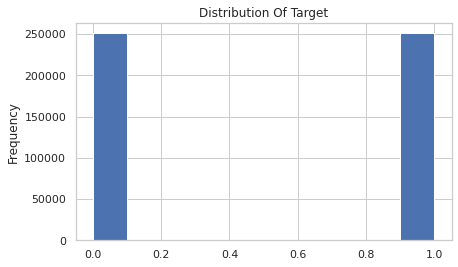

In [9]:
print("job 데이터 target 분포도:")
print(job_data['target'].value_counts())
job_data['target'].plot.hist(title = "Distribution Of Target")


## 데이터에 포함된 결측치 파악
* 모든 데이터에서 결측치가 포함되어 있지 않음
* 결측치가 포함되어 있지 않기 때문에 결측치 처리를 하지 않아도 됨
  * 결측치가 포함되어 있다면 SimpleImputer 함수를 통해서 처리한다.
  * 평균 값으로 하고자 한다면 strategy = 'mean'
  * 중앙 값으로 하고자 한다면 strateget = 'median'
    * 대부분은 중앙 값으로 대체하는 게 옳다. 평균 값은 이상치에 따라서 외곡이 크기 때문이다. 이는 EDA를 통해서 데이터 분포를 파악해서 상황에 따라서 유동적으로 사용해야 함.

데이터 결측치 값: 
False    65
Name: mis_val_bool, dtype: int64


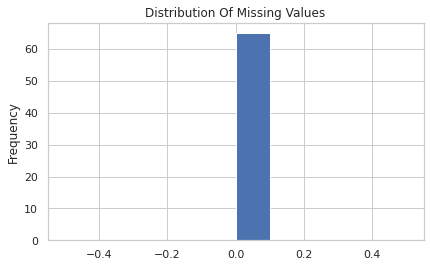

In [10]:
mis_val = job_data.isnull().sum()
mis_val_bool = mis_val >= 1

mis_val_df = pd.concat([mis_val, mis_val_bool], axis = 1)
mis_val_df = mis_val_df.rename(columns = {0: 'mis_val', 1: 'mis_val_bool'})

print("데이터 결측치 값: ")
print(mis_val_df['mis_val_bool'].value_counts())

mis_val_df['mis_val_bool'].astype(int).plot.hist(title = "Distribution Of Missing Values")

In [11]:
mis_val_df.head(60)

,mis_val,mis_val_bool
id,0,False
d_l_match_yn,0,False
d_m_match_yn,0,False
d_s_match_yn,0,False
h_l_match_yn,0,False
h_m_match_yn,0,False
h_s_match_yn,0,False
person_attribute_a,0,False
person_attribute_a_1,0,False
person_attribute_b,0,False


## 데이터 컬럼에 대한 분포도 확인
* int형이 39개 (target 값이 여기에 속함) --> 21.12.26 데이터 변경 이후 59개
* float64형이 16개                       --> 21.12.26 데이터 변경 이후 0개
* bool 형이 6개

In [12]:
job_data.dtypes.value_counts()

int64    59
bool      6
dtype: int64

**int형에 속하는 컬럼들에 특징 값 분포**
* 특징 값 분포를 통해서 Label Encoding과 Ont-Hot Encoding 방식을 결정
* 가장 많은 특징 값을 갖는 것이 'person_rn'
* 동일한 특징 값을 갖는 특징들은 ['person_prefer_f', 'person_prefer_g', 'Y'] 라는 것을 파악
* 모든 값에 대해서 동일한 값을 갖는 것을 주목해야 한다.
* 이러한 특징 값들은 추후 모델 학습에서 Drop 시키고 학습을 실시 하겠습니다.

In [13]:
job_data.select_dtypes('int64').apply(pd.Series.nunique, axis=0)

id                        501951
person_attribute_a             2
person_attribute_a_1           8
person_attribute_b             6
person_prefer_c                5
person_prefer_d_1           1093
person_prefer_d_2           1081
person_prefer_d_3           1043
person_prefer_e               12
person_prefer_f                1
person_prefer_g                1
person_prefer_h_1            279
person_prefer_h_2            279
person_prefer_h_3            279
contents_attribute_i           3
contents_attribute_a           3
contents_attribute_j_1         9
contents_attribute_j           2
contents_attribute_c           4
contents_attribute_k           2
contents_attribute_l        1752
contents_attribute_d        1065
contents_attribute_m           5
contents_attribute_e          12
contents_attribute_h         250
person_rn                 300177
contents_rn               283359
person_prefer_d_1_n          443
person_prefer_d_1_s          137
person_prefer_d_1_m           36
person_pre

## INT형 특징들에 대한 EDA 실시

### person_attribute_a
* 회원 속성 A 특징 값
* **Categorical Features** 
* 2개의 unique한 값(1,2)을 갖고 있기 때문에 많은 그래프를 그리지 않음
* 다른 특징 값과 연계해서 많이 그리도록 하겠음

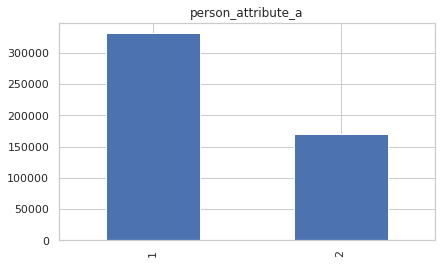

In [14]:
# 속성 값에 따른 분포도 파악
job_data['person_attribute_a'].value_counts().plot.bar(title = 'person_attribute_a')

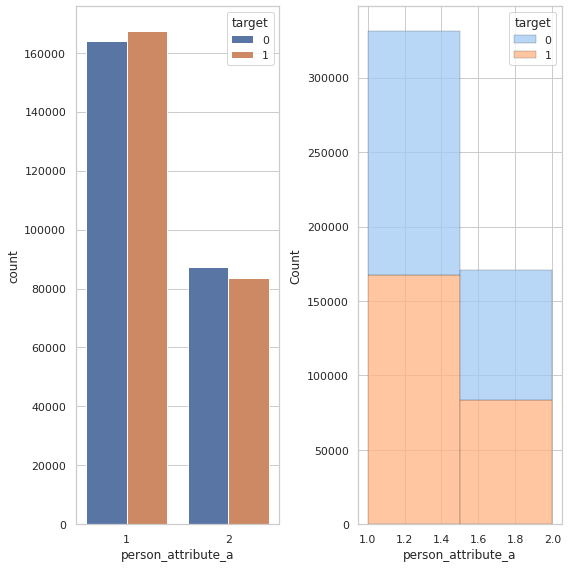

In [15]:
f, ax = plt.subplots(1, 2, figsize = (8, 8))

x = 'person_attribute_a'
y = 'target'

sns.countplot('person_attribute_a', hue = 'target', data = job_data, ax = ax[0])

sns.histplot(job_data,
            x = "person_attribute_a",
            hue="target",
            multiple="stack", 
            palette="pastel",
            edgecolor=".10",
            linewidth=".20",
            bins = 2,
            ax = ax[1])

plt.tight_layout(h_pad = 2.5)

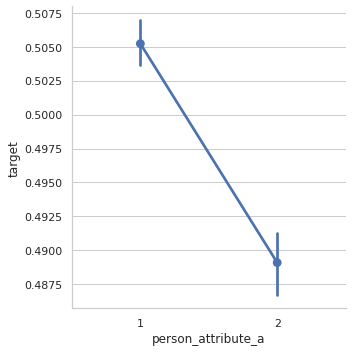

In [16]:
sns.factorplot(x, y, data = job_data)

1의 특징 값을 값을 갖는 사람들이 target 1일 확률이 더욱 높음

**person_attribute_a_1**

* 회원 속성 A 하위 속성 1 특징 값
  * 순서형 (0~7) 
  * 순서에 차이가 의미가 있음.   
  EX : (5-1)의 차이보다 (5-2)의 차이가 더 가까움

person_attribute_a_1: 
0    158626
1     61195
5     57783
2     51895
6     49820
3     46340
4     44325
7     31967
Name: person_attribute_a_1, dtype: int64


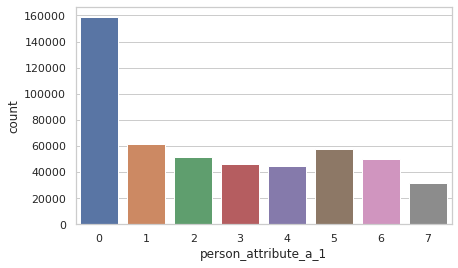

In [17]:
print("person_attribute_a_1: ")
print(job_data['person_attribute_a_1'].value_counts())

sns.countplot('person_attribute_a_1', data =job_data)

대부분의 사람들이 0의 값을 취하고 있는 것을 볼 수 있음

In [18]:
value = job_data['person_attribute_a_1'].value_counts()
value_percent = job_data['person_attribute_a_1'].value_counts() / len(job_data) * 100
value_table = pd.concat([value, value_percent], axis=1)
value_table.columns = ['Num Of Values', '% of Total Values']
value_table

,Num Of Values,% of Total Values
0,158626,31.601889
1,61195,12.191429
5,57783,11.511681
2,51895,10.338659
6,49820,9.925272
3,46340,9.231977
4,44325,8.830543
7,31967,6.368550


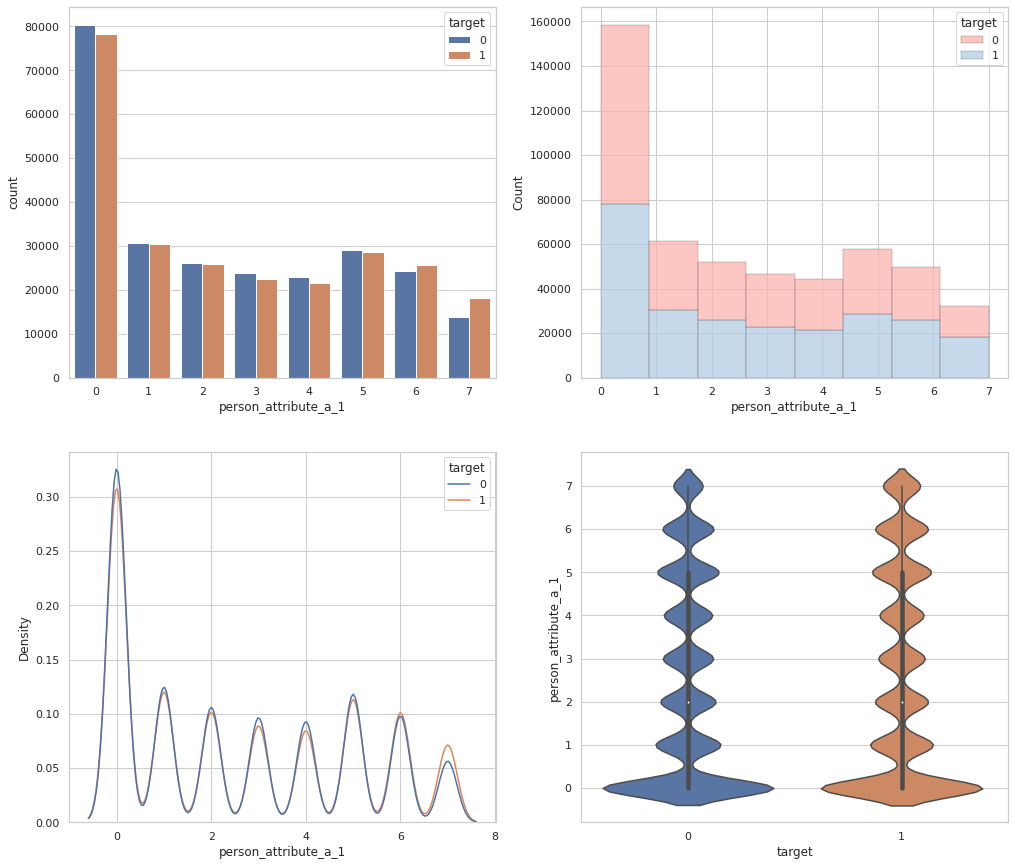

In [19]:
f, ax = plt.subplots(2,2, figsize=(15,15))

sns.countplot('person_attribute_a_1', hue = 'target', data =job_data, ax=ax[0][0])
sns.histplot(job_data,
            x = "person_attribute_a_1",
            hue="target",
            multiple="stack", 
            palette="Pastel1",
            edgecolor=".10",
            linewidth=".20",
            bins = 8,
            ax = ax[0][1])
sns.kdeplot(data=job_data, x="person_attribute_a_1", hue='target', ax=ax[1][0])
sns.violinplot(data=job_data, x="target", y="person_attribute_a_1", ax=ax[1][1])
plt.show()

* person_attribute_a_1 값들은 모두 비슷한 형태의 모양을 뜀
* Violinplot의 모양이 매우 흥미롭게 느껴짐
  * target 값이 0인 것과 1인 것에 있어서 매우 유사한 형태로 뛰고 있음
  * 이를 통해서 어떠한 특징 값을 갖더라도 그 값에 해당하는 사람은 target에 있어서 비슷한 형태를 취하는 것 으로 추정됨
* 하지만 대부분의 사람들이 0의 값을 취하는 것은 신기하게 느껴지네요.

**person_attribute_a에 따른 person_attribute_a_1 분포도**
* 이름이 비슷해서 혼동 되기 쉽습니다.
* person_attribute_a는 위에서 보았던 이진 데이터 입니다. (1과 2의 값을 갖던)

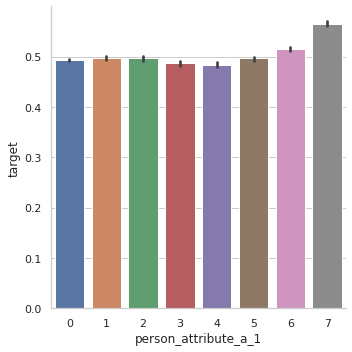

In [20]:
sns.catplot(x="person_attribute_a_1", y="target", kind="bar", data=job_data)

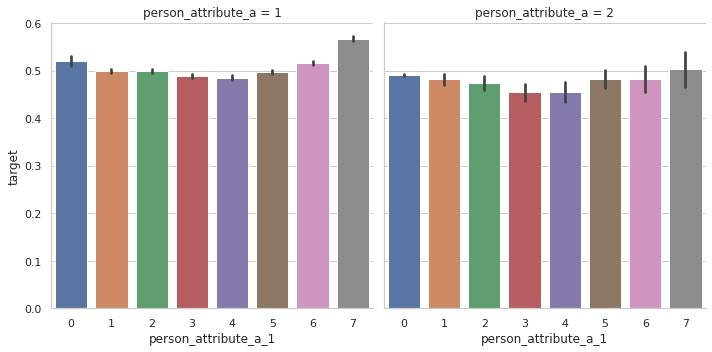

In [21]:
sns.catplot(x="person_attribute_a_1", y="target", col = "person_attribute_a" , kind="bar", data=job_data)

* person_attribute_a 값이 1일 때 target 값이 더욱 높은 것을 앞에서 보았음
* person_attribute_a 값에 따라서 person_attribute_a_1 분포도는 크게 변하지 않는 것으로 보임
* 하지만 두 경우 모두 person_attribute_a_1 값이 7일 때 target 값일 확률이 높은 것으로 보임

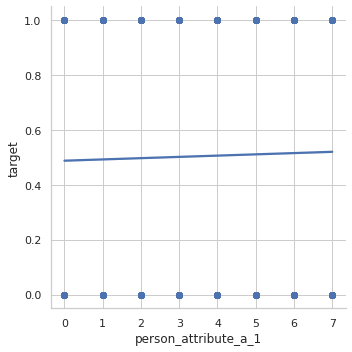

In [22]:
sns.lmplot(x = 'person_attribute_a_1', y = 'target', data = job_data)

In [23]:
pd.crosstab(job_data.person_attribute_a_1,job_data.target,margins=True).style.background_gradient(cmap='summer_r')

target,0,1,All
person_attribute_a_1,,,
0,80423,78203,158626
1,30739,30456,61195
2,26135,25760,51895
3,23779,22561,46340
4,22889,21436,44325
5,29101,28682,57783
6,24159,25661,49820
7,13881,18086,31967
All,251106,250845,501951


### person_attribute_b

* 회원 속성 B 특징 값
  * 순서형 0~5
  * 순서에 차이가 의미가 있음.   
  EX : (5-1)의 차이보다 (5-2)의 차이가 더 가까움 

person_attribute_b:
2    223884
3    139489
4    121200
1     10150
5      7123
0       105
Name: person_attribute_b, dtype: int64


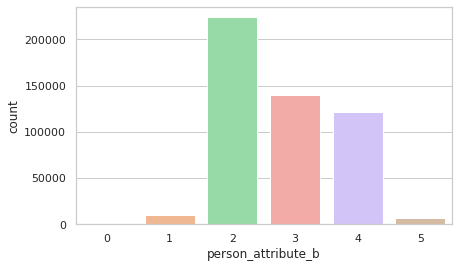

In [24]:
print("person_attribute_b:")
print(job_data["person_attribute_b"].value_counts())

sns.countplot('person_attribute_b', data = job_data, palette = 'pastel')

* 다른 값에 비해 0이 매우 적은 것을 볼 수 있음

In [25]:
value = job_data['person_attribute_b'].value_counts()
value_percent = job_data['person_attribute_b'].value_counts() / len(job_data) *100
value_table = pd.concat([value, value_percent], axis = 1)
value_table.columns = ['Num Of Values', '% of Total Values']
value_table

,Num Of Values,% of Total Values
2,223884,44.602760
3,139489,27.789366
4,121200,24.145783
1,10150,2.022110
5,7123,1.419063
0,105,0.020918


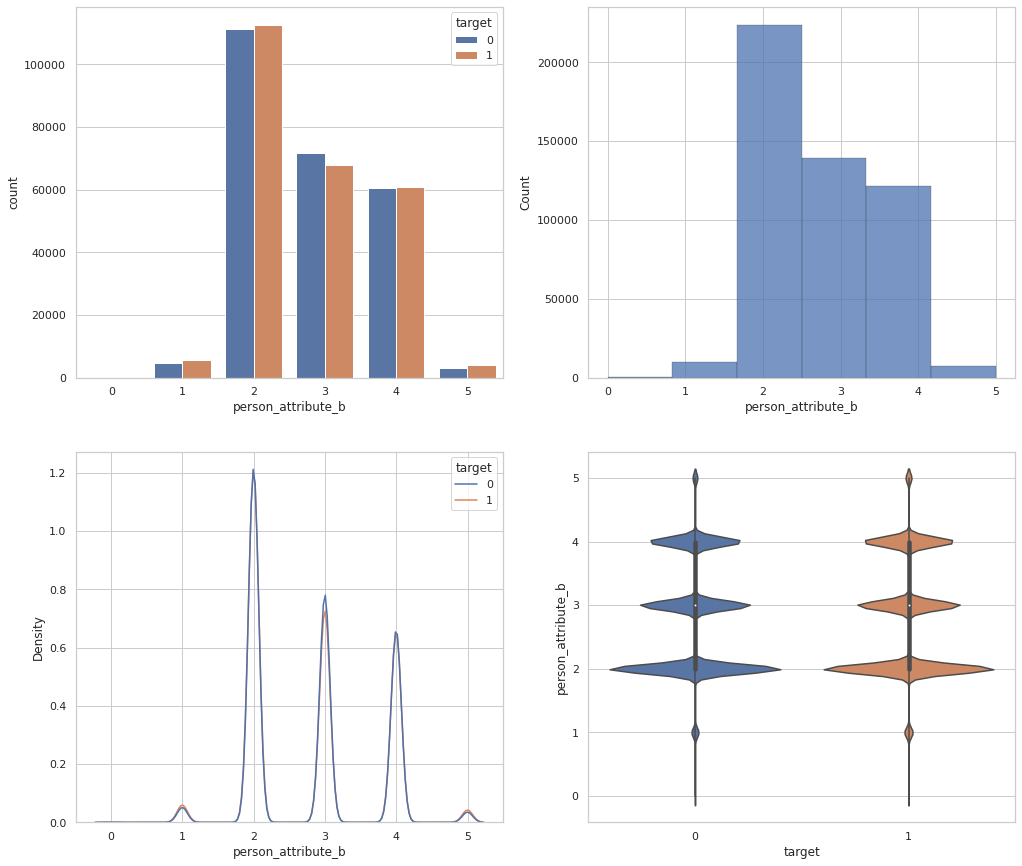

In [26]:
f, ax = plt.subplots(2,2, figsize = (15,15))

x = 'person_attribute_b'
y = 'target'

sns.countplot(x = x, hue = y, data=job_data, ax = ax[0][0])
sns.histplot(data = job_data,
             x = x,
             multiple="stack",
             palette='pastel',
             edgecolor=".10",
             linewidth=".20",
             bins = 6,
             ax = ax[0][1]
             )
sns.kdeplot(data = job_data, x = x, hue = y, ax = ax[1][0])
sns.violinplot(data = job_data, x=y, y=x, ax=ax[1][1])
plt.show()

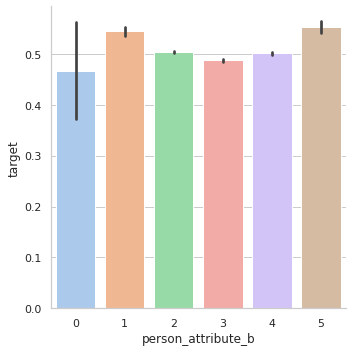

In [27]:
sns.catplot(x=x, y=y, kind='bar', data = job_data, palette= 'pastel')

* 1과 5를 제외하고 타겟값이 1일 확률이 0.5 이하. 하지만, 큰 차이를 보이지는 않고있음

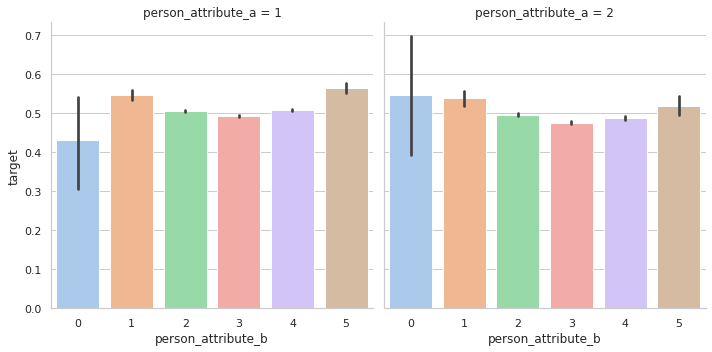

In [28]:
sns.catplot(x=x, y=y, kind="bar",col="person_attribute_a", data = job_data, palette = "pastel")

* person_attribute_a 값에 따라서 0의 특징값이 가장 영향을 받는것으로 보임
* person_attribute_a는 1의 값이 더욱 높은 확률로 target이 1이 되었음
* 하지만 person_attribute_b의 0인경우에는 이러한 부분과 반대되는 모습을 보임

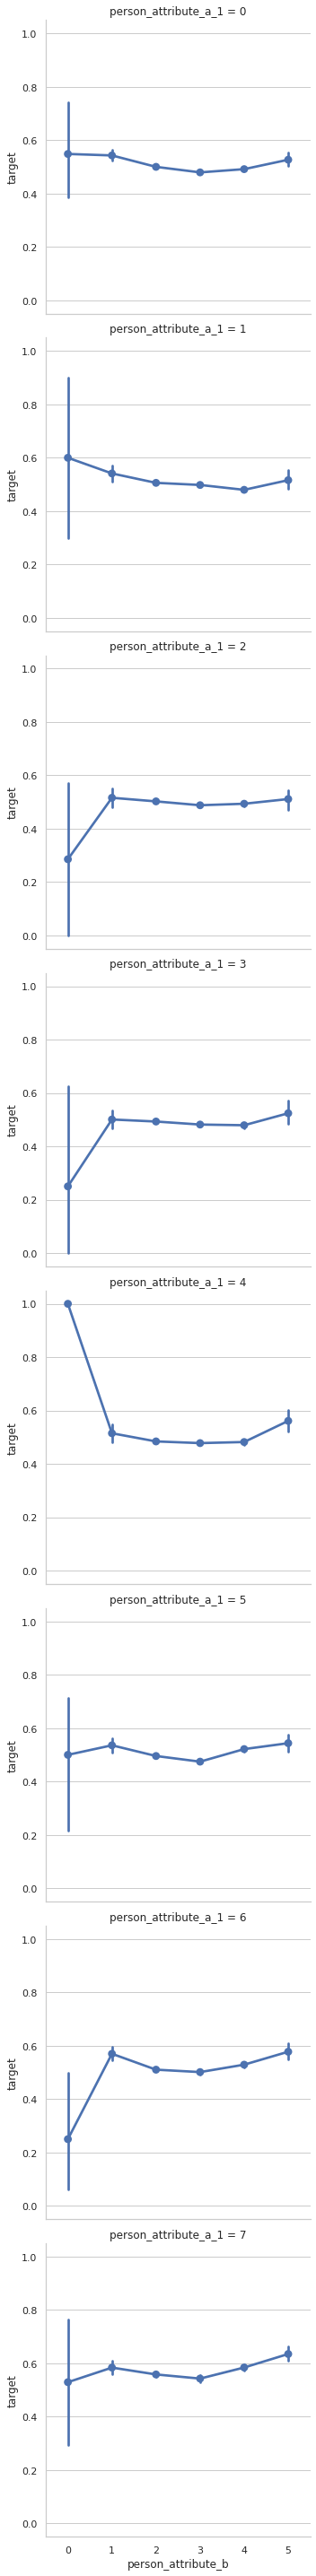

In [29]:
sns.catplot(x=x, y=y, kind ="point", row="person_attribute_a_1", data = job_data) # 범주형 변수와 수(치)형 변수간 관계 시각화

1. person_attribute_a_1 = 1 일때 person_attribute_b = 0 보다 person_attribute_b > 0 일 경우 target이 1일 경우가 작음
2. person_attribute_a_1 = 2 일때 person_attribute_b = 0 보다 person_attribute_b > 0 일 경우 target이 1일 경우가 큼
3. person_attribute_a_1 = 3 일때 person_attribute_b = 0 보다 person_attribute_b > 0 일 경우 target이 1일 경우가 큼
**4. person_attribute_a_1 = 4 이고 person_attribute_b = 0 이면 target 은 무조건 1이 되는 현상이 보임**
5. person_attribute_a_1 = 5 일때 person_attribute_b 값에 상관없이 target이 1일 경우 유사함
6. person_attribute_a_1 = 6 일때 person_attribute_b = 0 보다 person_attribute_b > 0 일 경우 target이 1일 경우가 큼
7. person_attribute_a_1 = 7 일때 person_attribute_b 값에 상관없이 target이 1일 경우 유사함

In [30]:
#  person_attribute_a_1 = 4 이고 person_attribute_b = 0인 경우
job_data.loc[(job_data['person_attribute_a_1'] == 4) & (job_data['person_attribute_b'] == 0)]

,id,d_l_match_yn,d_m_match_yn,d_s_match_yn,h_l_match_yn,h_m_match_yn,h_s_match_yn,person_attribute_a,person_attribute_a_1,person_attribute_b,person_prefer_c,person_prefer_d_1,person_prefer_d_2,person_prefer_d_3,person_prefer_e,person_prefer_f,person_prefer_g,person_prefer_h_1,person_prefer_h_2,person_prefer_h_3,contents_attribute_i,contents_attribute_a,contents_attribute_j_1,contents_attribute_j,contents_attribute_c,contents_attribute_k,contents_attribute_l,contents_attribute_d,contents_attribute_m,contents_attribute_e,contents_attribute_h,person_rn,contents_rn,person_prefer_d_1_n,person_prefer_d_1_s,person_prefer_d_1_m,person_prefer_d_1_l,person_prefer_d_2_n,person_prefer_d_2_s,person_prefer_d_2_m,person_prefer_d_2_l,person_prefer_d_3_n,person_prefer_d_3_s,person_prefer_d_3_m,person_prefer_d_3_l,contents_attribute_d_n,contents_attribute_d_s,contents_attribute_d_m,contents_attribute_d_l,person_prefer_h_1_l,person_prefer_h_1_m,person_prefer_h_2_l,person_prefer_h_2_m,person_prefer_h_3_l,person_prefer_h_3_m,contents_attribute_h_l,contents_attribute_h_m,contents_attribute_l_n,contents_attribute_l_s,contents_attribute_l_m,contents_attribute_l_l,Y,M,D,target
427988,427988,False,False,False,True,True,True,1,4,0,5,851,1229,1228,6,1,1,285,287,279,3,3,5,1,1,2,551,1005,2,6,285,326110,188701,847,847,824,744,1227,1227,1227,926,1227,1227,1227,926,1003,1001,1000,926,277,544,277,546,277,543,277,544,550,544,527,2006,2020,5,19,1
429248,429248,False,False,False,True,True,True,1,4,0,5,851,1229,1228,6,1,1,285,287,279,1,3,5,1,1,2,476,1227,1,5,285,326110,188242,847,847,824,744,1227,1227,1227,926,1227,1227,1227,926,1227,1227,1227,926,277,544,277,546,277,543,277,544,471,467,441,2006,2020,4,25,1


 * person_attribute_a_1 = 4 이고 person_attribute_b = 0인 모수가 적어서(2명) 해당 경우가 발생한것으로 보임

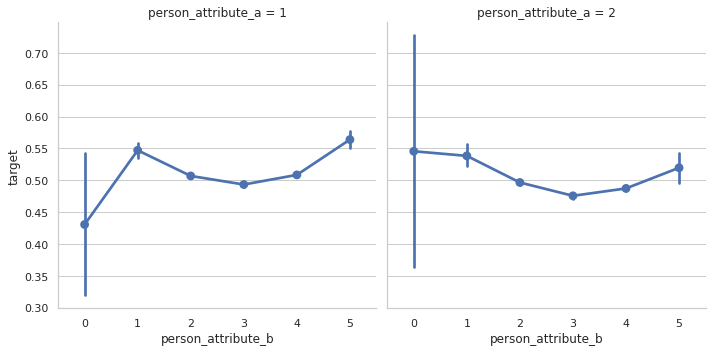

In [31]:
sns.catplot(x=x, y=y, kind="point", col = "person_attribute_a", data = job_data)

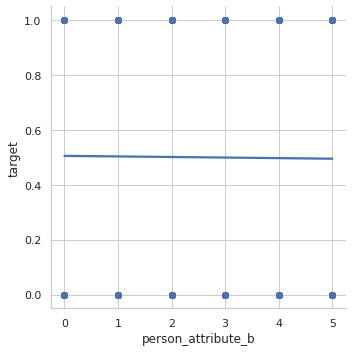

In [32]:
sns.lmplot(x="person_attribute_b", y=y, data = job_data)

### person_prefer_c

* 회원 선호 속성 C 특징 값
  * 명목형 (1,2,3,4,5)


person_prefer_c:
1    304571
5    156688
2     20223
3     15665
4      4804
Name: person_prefer_c, dtype: int64


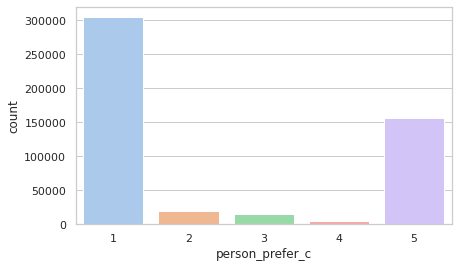

In [33]:
print("person_prefer_c:")
print(job_data["person_prefer_c"].value_counts())

sns.countplot('person_prefer_c', data = job_data, palette = 'pastel')

In [34]:
value = job_data['person_prefer_c'].value_counts()
value_percent = job_data['person_prefer_c'].value_counts() / len(job_data) * 100
value_table = pd.concat([value, value_percent], axis = 1)
value_table.columns = ['Num of values', '% of total values']
value_table

,Num of values,% of total values
1,304571,60.677437
5,156688,31.215796
2,20223,4.028879
3,15665,3.120823
4,4804,0.957066


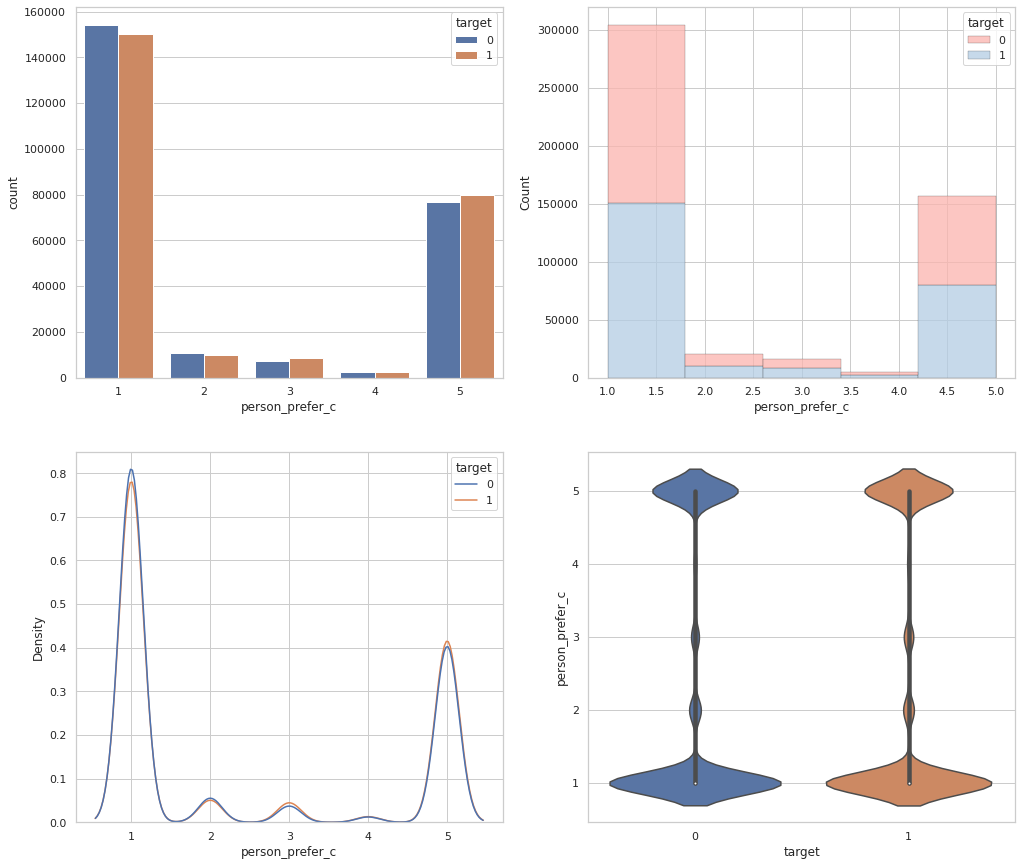

In [35]:
f, ax = plt.subplots(2,2, figsize=(15,15))

x = 'person_prefer_c'
y = 'target'
sns.countplot(x=x, hue=y, data = job_data, ax=ax[0][0])
sns.histplot(data = job_data,
             x=x,
             hue=y,
             multiple="stack",
             palette="Pastel1",
             edgecolor=".10",
             linewidth=".20",
             bins=5,
             ax=ax[0][1]
             )
sns.kdeplot(data = job_data, x=x, hue=y, ax=ax[1][0])
sns.violinplot(data=job_data, x=y, y=x, ax=ax[1][1])
plt.show()

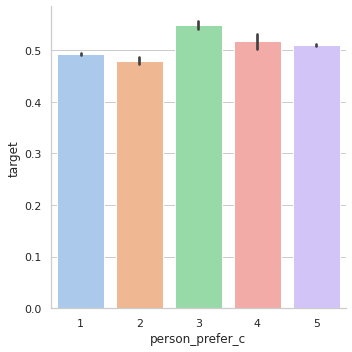

In [36]:
sns.catplot(x=x, y=y, kind="bar", data = job_data, palette='pastel')

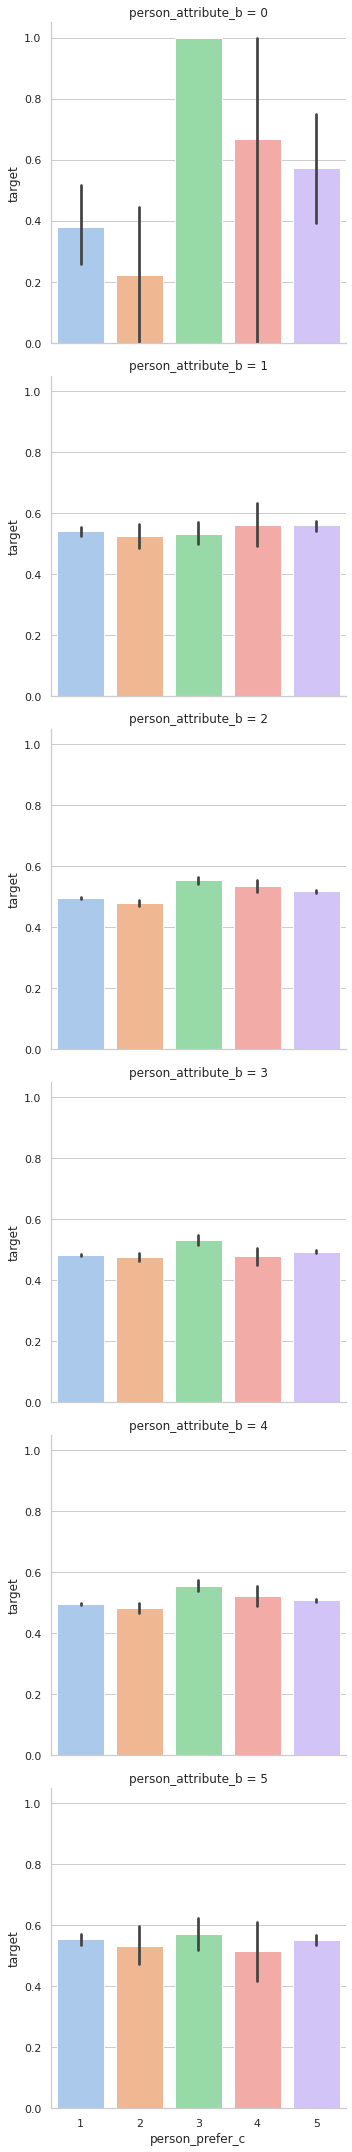

In [37]:
sns.catplot(x=x,y=y, kind='bar', row='person_attribute_b', data = job_data, palette='pastel')

* person_prefer_c = 3 이고 person_attribute_b=0일경우 무조건 target = 1인것을 알 수 있음

In [38]:
job_data.loc[(job_data['person_prefer_c']==3)&(job_data['person_attribute_b']==0)]

,id,d_l_match_yn,d_m_match_yn,d_s_match_yn,h_l_match_yn,h_m_match_yn,h_s_match_yn,person_attribute_a,person_attribute_a_1,person_attribute_b,person_prefer_c,person_prefer_d_1,person_prefer_d_2,person_prefer_d_3,person_prefer_e,person_prefer_f,person_prefer_g,person_prefer_h_1,person_prefer_h_2,person_prefer_h_3,contents_attribute_i,contents_attribute_a,contents_attribute_j_1,contents_attribute_j,contents_attribute_c,contents_attribute_k,contents_attribute_l,contents_attribute_d,contents_attribute_m,contents_attribute_e,contents_attribute_h,person_rn,contents_rn,person_prefer_d_1_n,person_prefer_d_1_s,person_prefer_d_1_m,person_prefer_d_1_l,person_prefer_d_2_n,person_prefer_d_2_s,person_prefer_d_2_m,person_prefer_d_2_l,person_prefer_d_3_n,person_prefer_d_3_s,person_prefer_d_3_m,person_prefer_d_3_l,contents_attribute_d_n,contents_attribute_d_s,contents_attribute_d_m,contents_attribute_d_l,person_prefer_h_1_l,person_prefer_h_1_m,person_prefer_h_2_l,person_prefer_h_2_m,person_prefer_h_3_l,person_prefer_h_3_m,contents_attribute_h_l,contents_attribute_h_m,contents_attribute_l_n,contents_attribute_l_s,contents_attribute_l_m,contents_attribute_l_l,Y,M,D,target
144520,144520,False,False,False,False,False,False,1,5,0,3,851,837,705,3,1,1,4,95,59,3,3,5,1,3,2,1672,705,2,4,136,17666,38714,847,847,824,744,836,831,824,744,703,703,690,618,703,703,690,618,3,316,94,398,58,368,94,419,1671,1670,1658,2017,2020,3,18,1
157233,157233,True,True,True,True,False,False,1,1,0,3,719,718,740,3,1,1,4,95,59,1,3,3,1,3,2,1646,719,4,3,27,25553,6454,718,717,716,618,718,717,716,618,740,735,716,618,718,717,716,618,3,316,94,398,58,368,3,339,1646,1646,1645,2017,2020,7,31,1
220839,220839,True,False,False,True,True,True,1,2,0,3,923,925,851,6,1,1,212,72,209,3,3,5,1,1,2,992,867,1,5,212,881007,613188,923,923,864,864,923,923,864,864,847,847,824,744,867,865,864,864,208,481,71,379,208,480,208,481,991,987,954,2009,2020,11,3,1
309103,309103,False,False,False,False,False,False,2,3,0,3,1057,894,1056,6,1,1,4,95,59,1,1,5,1,1,2,953,894,1,6,88,39634,151298,1056,1054,1053,926,894,884,864,864,1056,1054,1053,926,894,884,864,864,3,316,94,398,58,368,85,393,952,951,930,2009,2020,6,9,1
314503,314503,False,False,False,False,False,False,1,5,0,3,851,837,705,3,1,1,4,95,59,1,3,5,1,3,2,1663,703,4,4,103,17666,1931,847,847,824,744,836,831,824,744,703,703,690,618,703,703,690,618,3,316,94,398,58,368,94,400,1662,1659,1658,2017,2020,2,8,1
378324,378324,False,False,False,True,False,False,1,5,0,3,851,837,705,3,1,1,4,95,59,3,3,5,1,3,2,1645,738,4,3,28,17666,3344,847,847,824,744,836,831,824,744,703,703,690,618,738,735,716,618,3,316,94,398,58,368,3,340,1645,1645,1645,2017,2020,3,31,1
437122,437122,True,True,True,False,False,False,1,5,0,3,1037,1039,985,5,1,1,101,109,96,3,1,5,1,1,2,438,1037,1,7,66,730543,306438,1037,1036,1000,926,1037,1036,1000,926,985,985,927,926,1037,1036,1000,926,94,400,94,403,94,399,58,374,437,417,407,2006,2020,3,26,1


In [39]:
7/len(job_data)

1.3945584329944556e-05

* person_prefer_c = 3 이고 person_attribute_b = 0 인 사람은 총 7명이며 모두 target = 1 이다 (약 0.0014%)

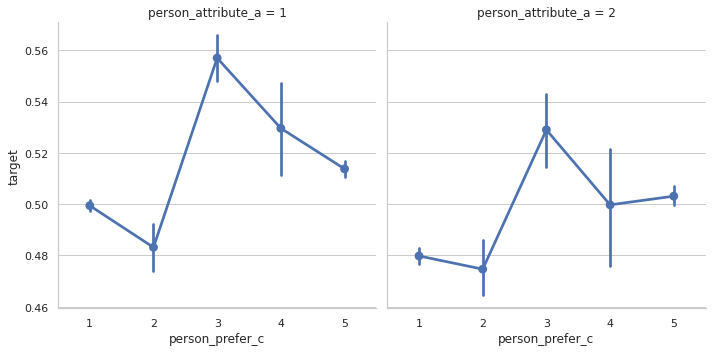

In [40]:
sns.catplot(x=x,y=y, kind="point", col='person_attribute_a', data = job_data)

* person_attribute_a 와 person_prefer_c에 따라 target 값이 크게 달라지지는 않는것으로 보임
* 다만, person_attribute_a값이 1일때 전체적으로 target 값이 1일 확률이 약간 더 높은것으로 나타남

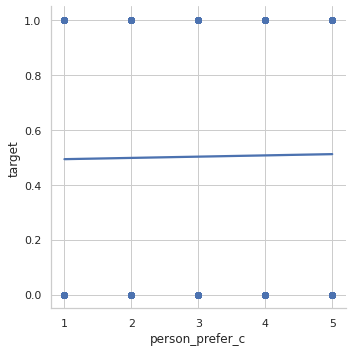

In [41]:
sns.lmplot(x=x, y=y, data=job_data)

### person_prefer_e
* 회원 선호 속성 E 특징 값
  * 순서형(0~11)
  * 순서에 차이가 의미가 있음.  
  EX : (5-1)의 차이보다 (5-2)의 차이가 더 가까움

In [42]:
def basic_person_eda(x, y, d = job_data):
  print(x, ":")
  print(d[x].value_counts(), '\n')

  sns.countplot(x, data = d, palette='pastel')
  plt.show()

  print('\n')
  print(x, ":")
  value = d[x].value_counts()
  value_percent = d[x].value_counts() / len(d) * 100
  value_table = pd.concat([value, value_percent], axis=1)
  value_table.columns =['Num of values', '% of tatal values']
  print(value_table, '\n')

  
  f, ax = plt.subplots(2,2, figsize=(15,15))
  sns.countplot(x =x, hue = y, data = d, ax=ax[0][0])
  sns.histplot(data = d,
               x = x,
               hue = y,
               multiple = 'stack',
               palette="Pastel1",
               edgecolor=".10",
               linewidth=".20",
               bins=12,
               ax = ax[0][1])
  sns.kdeplot(data = d, x=x, hue = y, ax=ax[1][0])
  sns.violinplot(data = d, x=y, y=x, ax=ax[1][1])
  plt.show()

  print("\n")
  sns.catplot(x=x, y=y, kind='bar', data = job_data, palette='pastel')
  plt.title("target ratio")
  plt.show()


person_prefer_e :
4     160100
3     139683
5      81635
0      66676
6      31407
7       8641
8       6259
2       2323
10      1936
9       1473
11      1452
1        366
Name: person_prefer_e, dtype: int64 



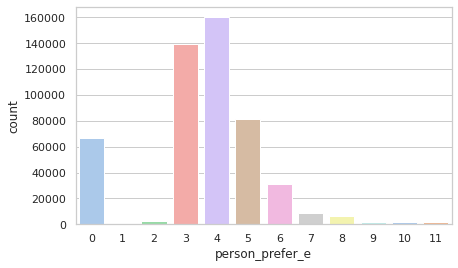



person_prefer_e :
    Num of values  % of tatal values
4          160100          31.895544
3          139683          27.828015
5           81635          16.263540
0           66676          13.283368
6           31407           6.256985
7            8641           1.721483
8            6259           1.246934
2            2323           0.462794
10           1936           0.385695
9            1473           0.293455
11           1452           0.289271
1             366           0.072915 



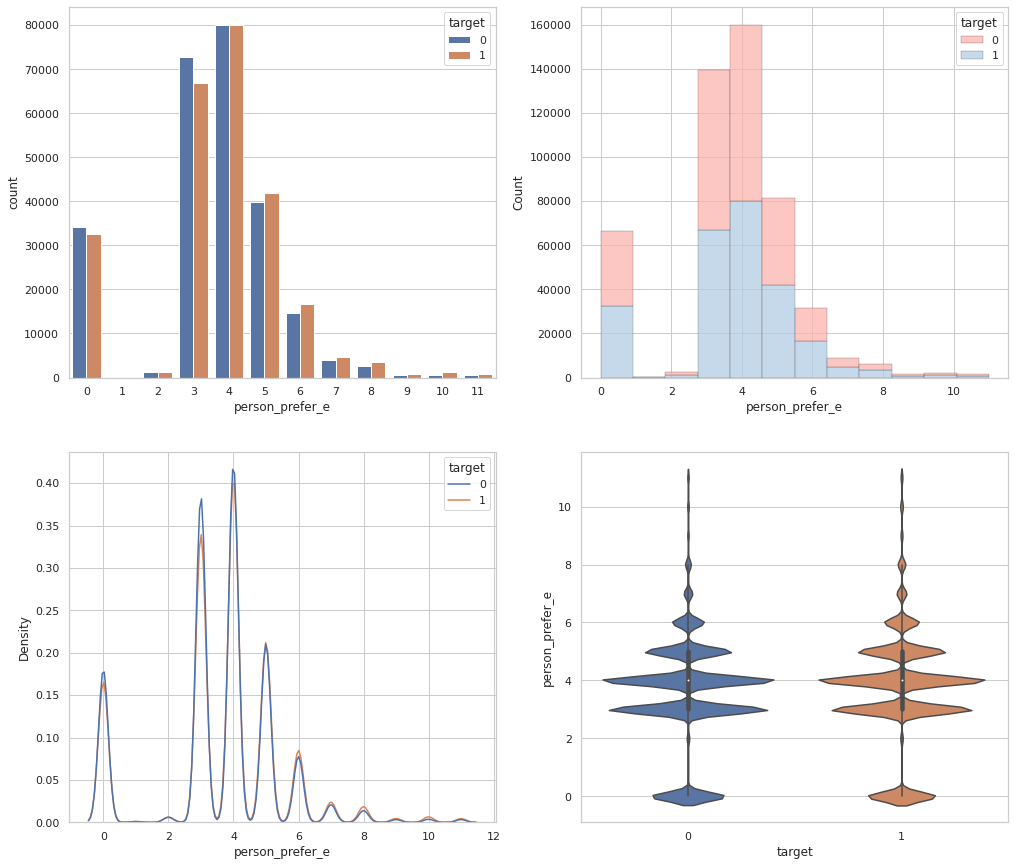

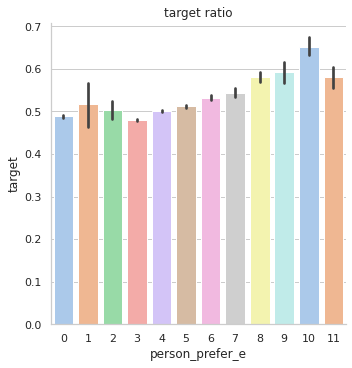

In [43]:
x='person_prefer_e'
y='target'
basic_person_eda(x=x,y=y)

* person_prefer_e 값이 증가할수록 target일 확률이 높아짐을 보임
* person_prefer_e = 10일경우 target 확률 60% 이상


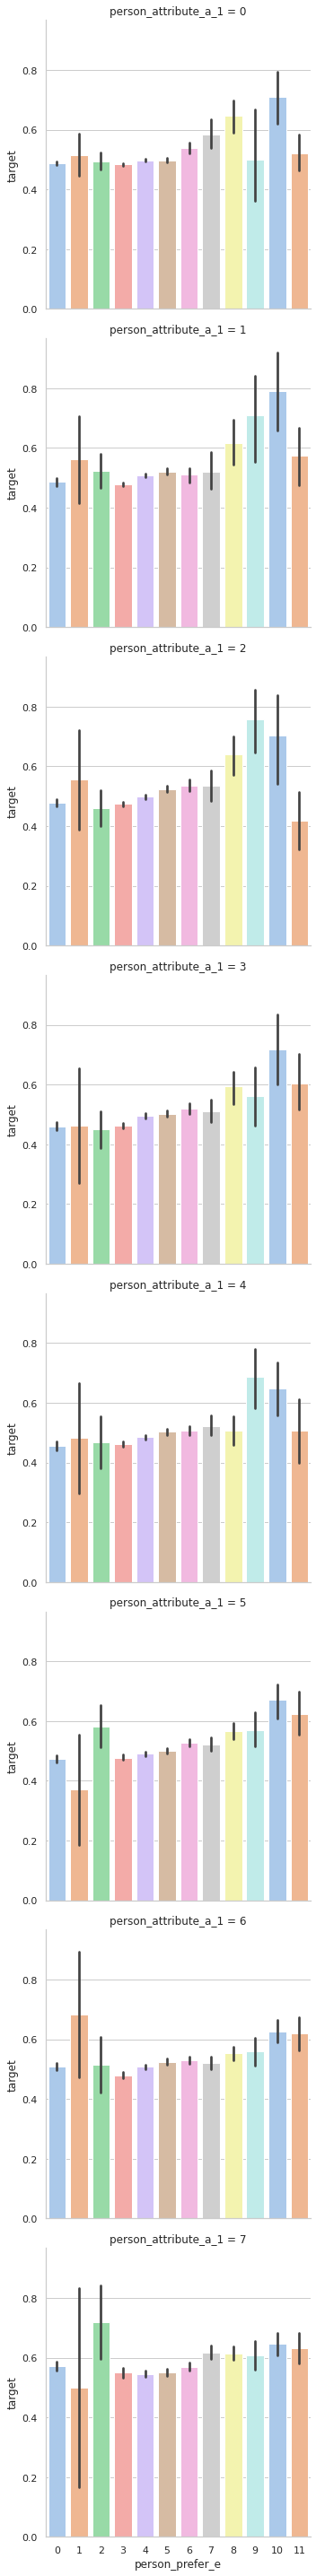

In [44]:
sns.catplot(x=x, y=y, kind='bar',  row = 'person_attribute_a_1', data = job_data, palette='pastel')

* person_attribute_a_1 값에 따라서도 그래프의 모양이 크게 바뀌는 것을 볼 수 있음

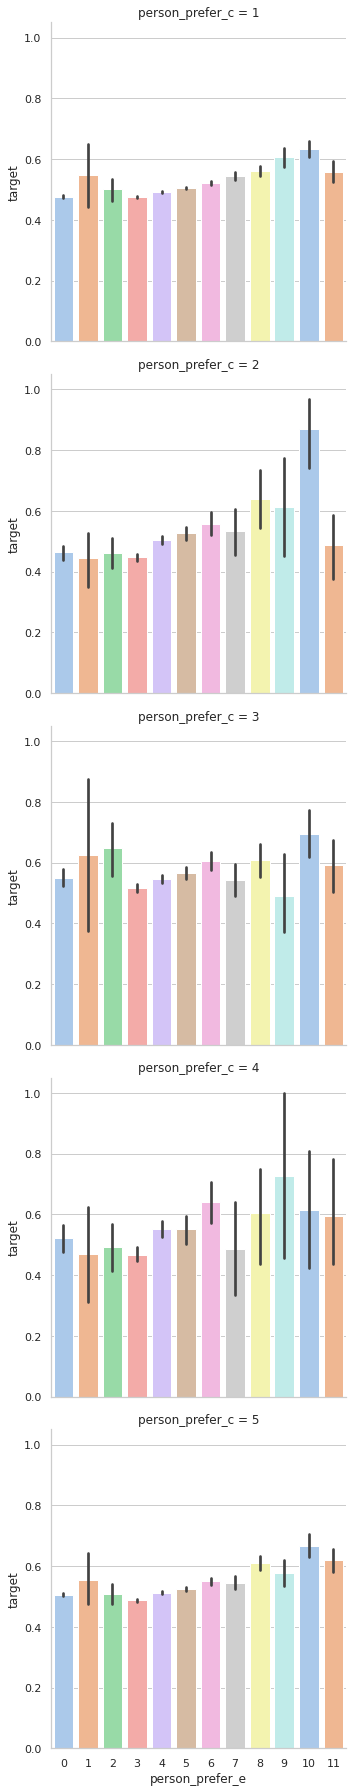

In [45]:
sns.catplot(x=x, y=y, kind="bar", row = "person_prefer_c", data=job_data, palette='pastel')

* person_prefer_c=2 일때 person_attribute_e 가 클수록 target확률이 높게 나타남 (e=10일때 target확률 0.8 이상)

In [46]:
## person_prefer_c=2 이고 person_attribute_e=10인 경우 수
len(job_data.loc[(job_data['person_prefer_c']== 2)&(job_data['person_prefer_e']==10)])

31

### person_prefer_f
* 회원 선호 속성 F 특징 값
* 2개 특징 값만 갖는 속성 (1,2)
* 모든값들이 1로만 구성  
    -> 추후 Feature Engineering 시 삭제

person_prefer_f :
1    501951
Name: person_prefer_f, dtype: int64 



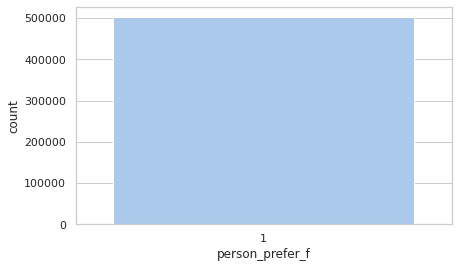



person_prefer_f :
   Num of values  % of tatal values
1         501951              100.0 



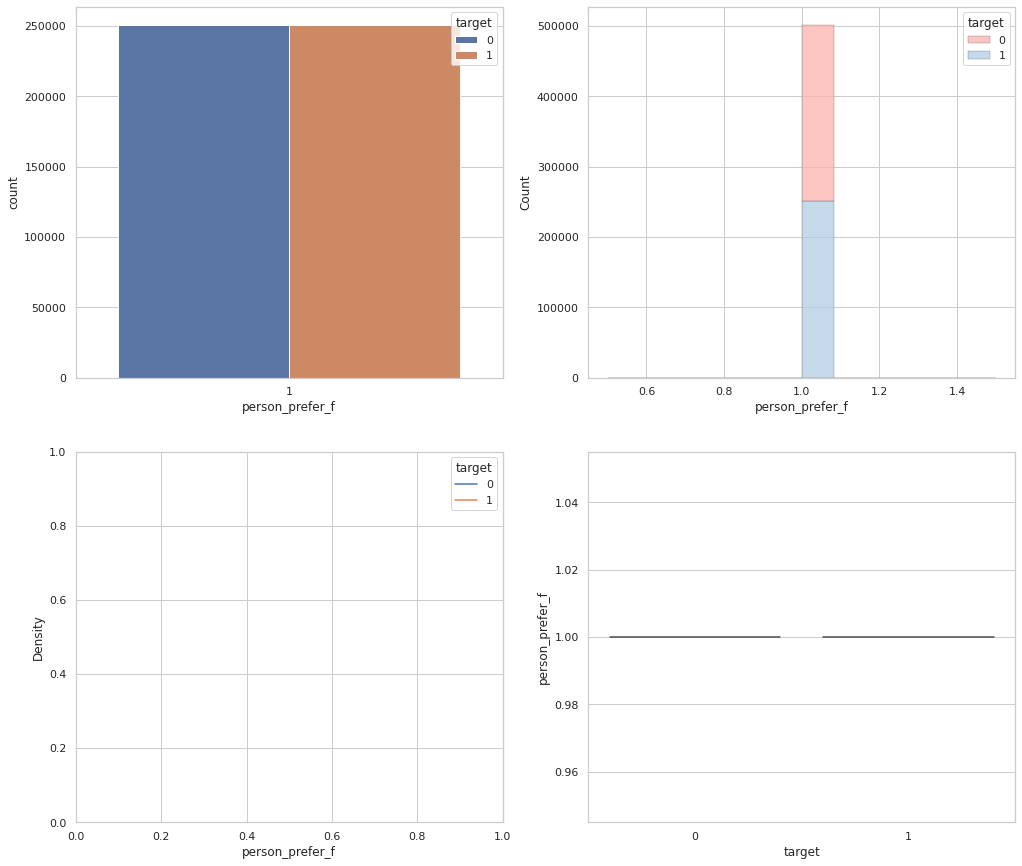

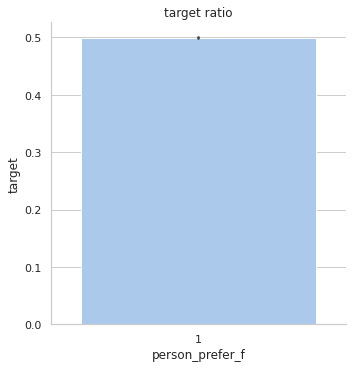

In [47]:
x = 'person_prefer_f'
y = 'target'
basic_person_eda(x=x,y=y)

### person_prefer_g
* 회원 선호 속성 G 특징값
* 2개 특징값만을 갖는 속성(1,2)
* 모든 값이 1로만 존재  
  --> 추후 Feature Engineering에서 삭제

person_prefer_g :
1    501951
Name: person_prefer_g, dtype: int64 



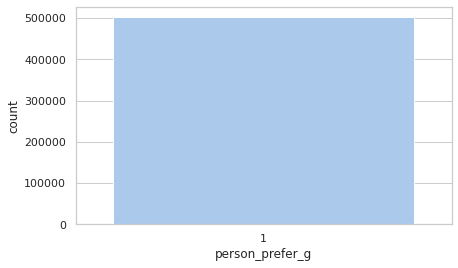



person_prefer_g :
   Num of values  % of tatal values
1         501951              100.0 



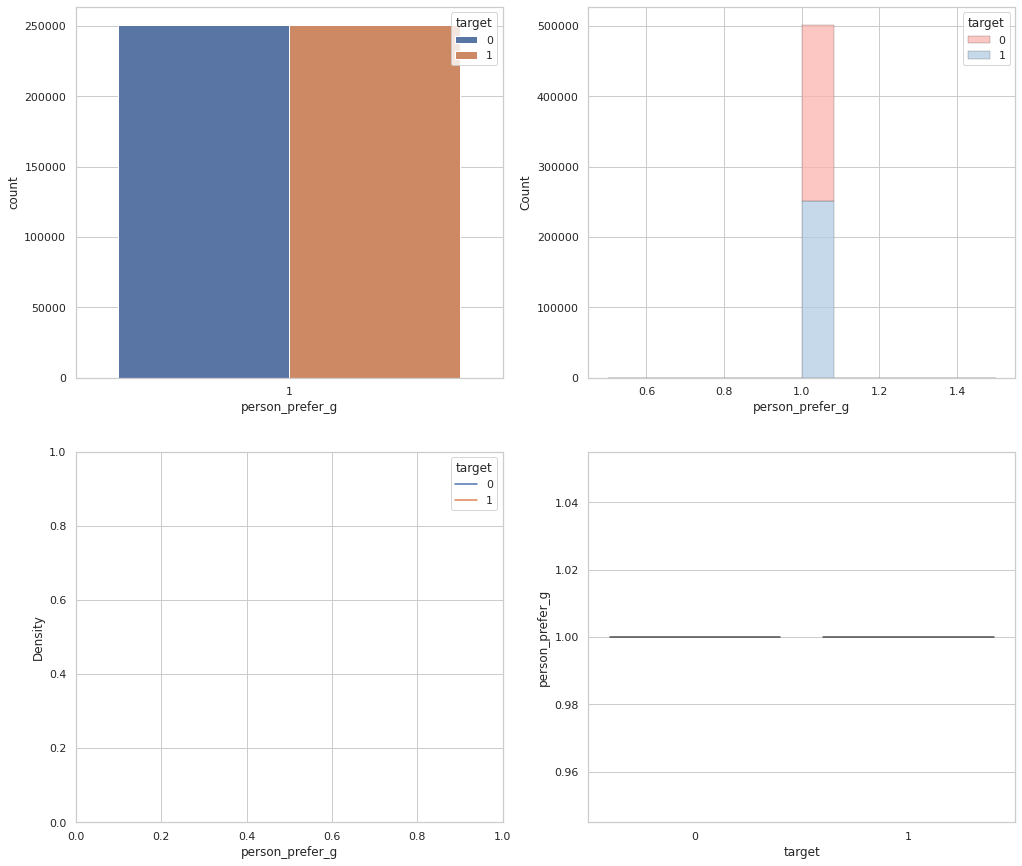

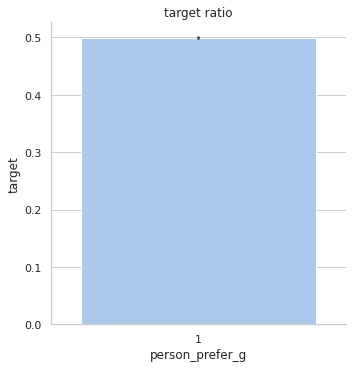

In [48]:
x = 'person_prefer_g'
y = 'target'
basic_person_eda(x=x,y=y)

## Contensts

### Contents attribute_i
* 컨텐츠 속성 i 특징값
* **Categorical Feature** (1,2,3)

contents_attribute_i :
3    341052
1    116273
2     44626
Name: contents_attribute_i, dtype: int64 



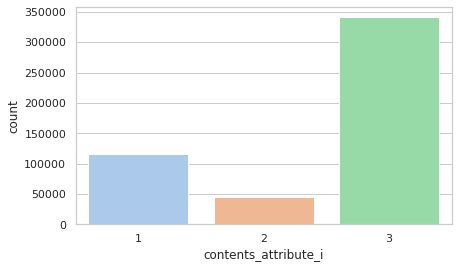



contents_attribute_i :
   Num of values  % of tatal values
3         341052          67.945278
1         116273          23.164213
2          44626           8.890509 



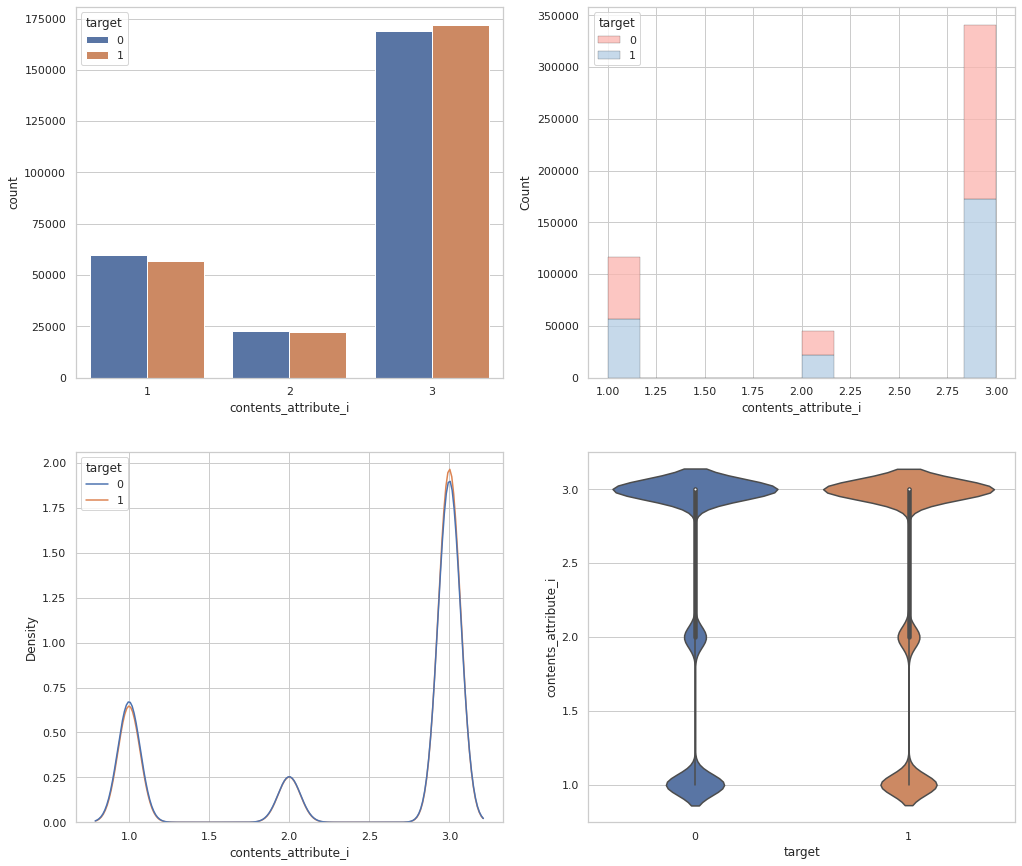

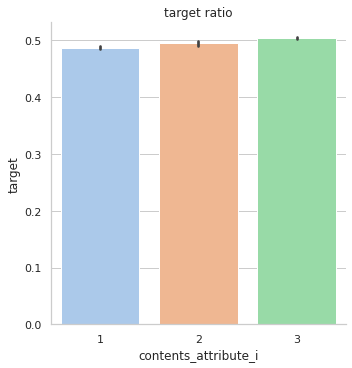

In [50]:
x = 'contents_attribute_i'
y = 'target'

basic_person_eda(x=x, y=y)

* contents_attribute_i 는 3에서 분포가 가장 큼



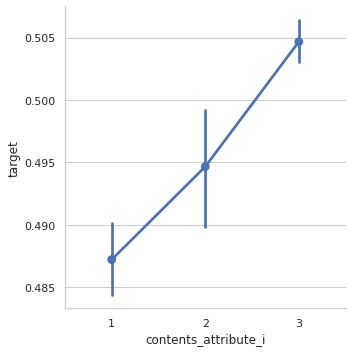

In [52]:
sns.catplot(x=x,y=y, kind='point', data= job_data)

* contents_attribute_i가 1과 2일때 target확률이 50%가 안됨

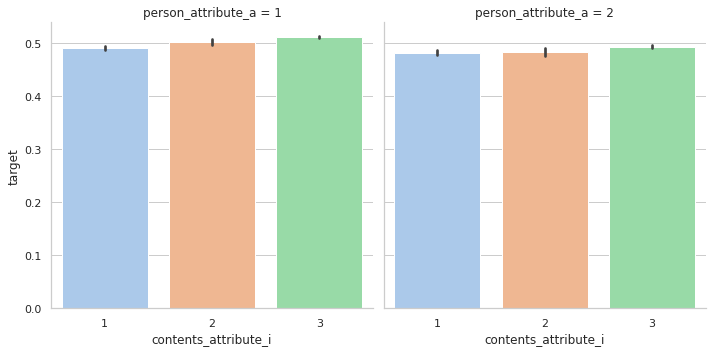

In [53]:
sns.catplot(x=x, y=y, kind='bar', col='person_attribute_a', data=job_data, palette='pastel')

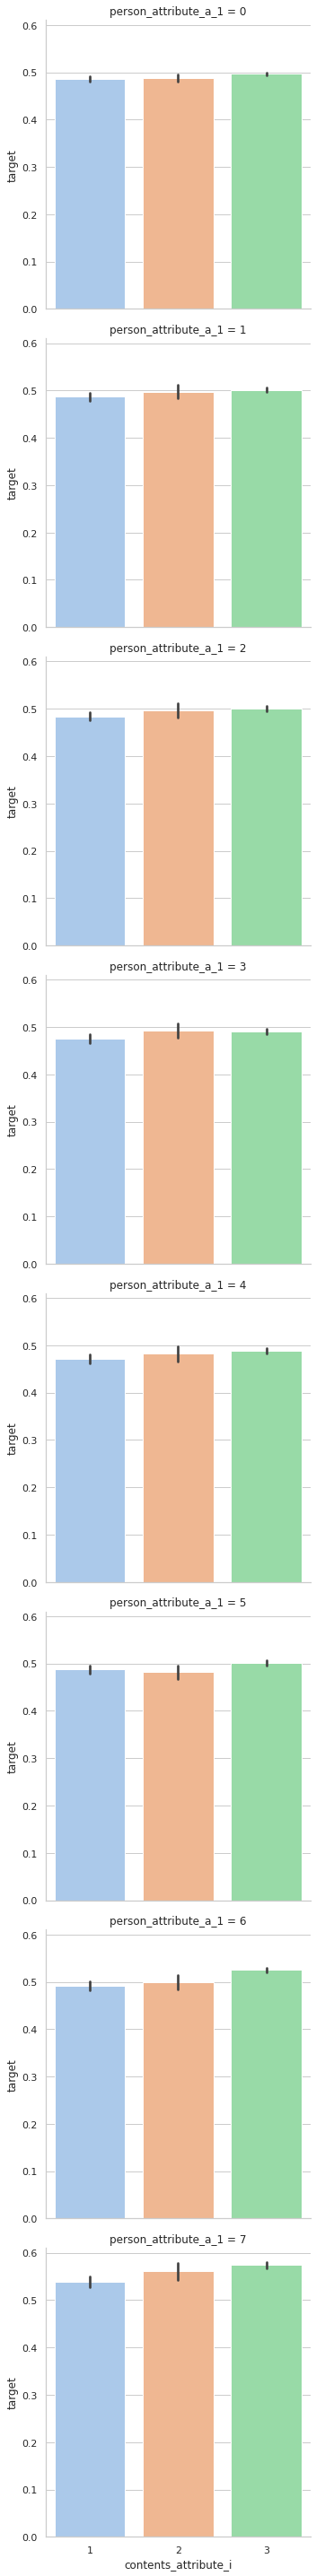

In [54]:
sns.catplot(x=x, y=y, kind='bar', row='person_attribute_a_1', data = job_data, palette='pastel')

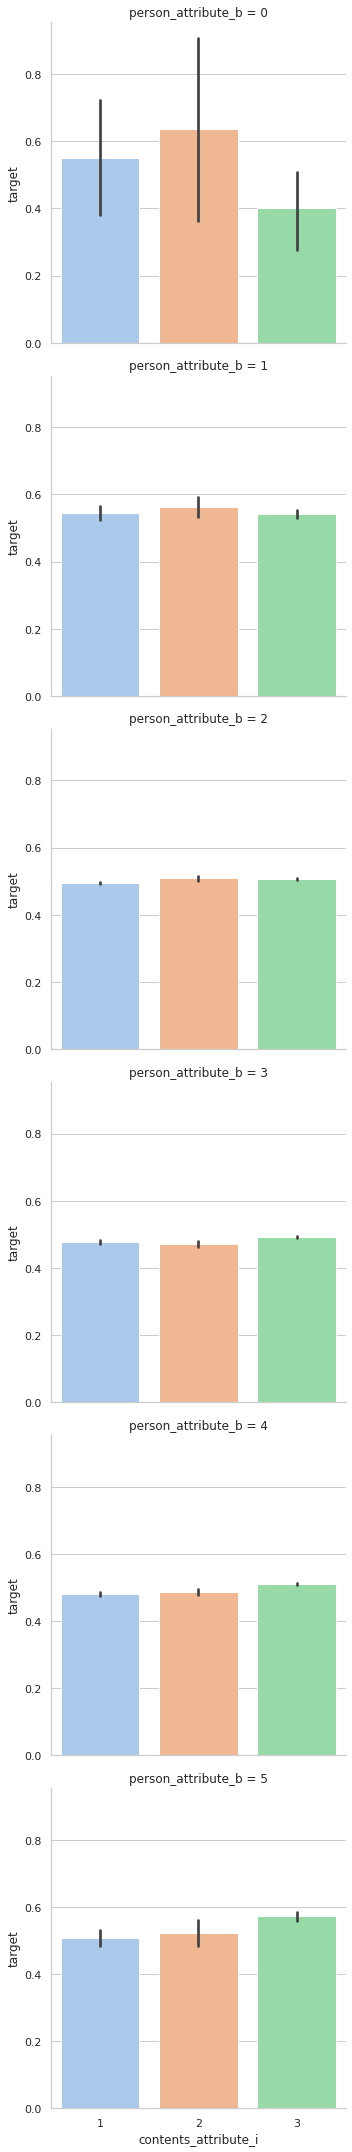

In [60]:
sns.catplot(x=x,y=y,kind='bar',row="person_attribute_b", data=job_data, palette='pastel')

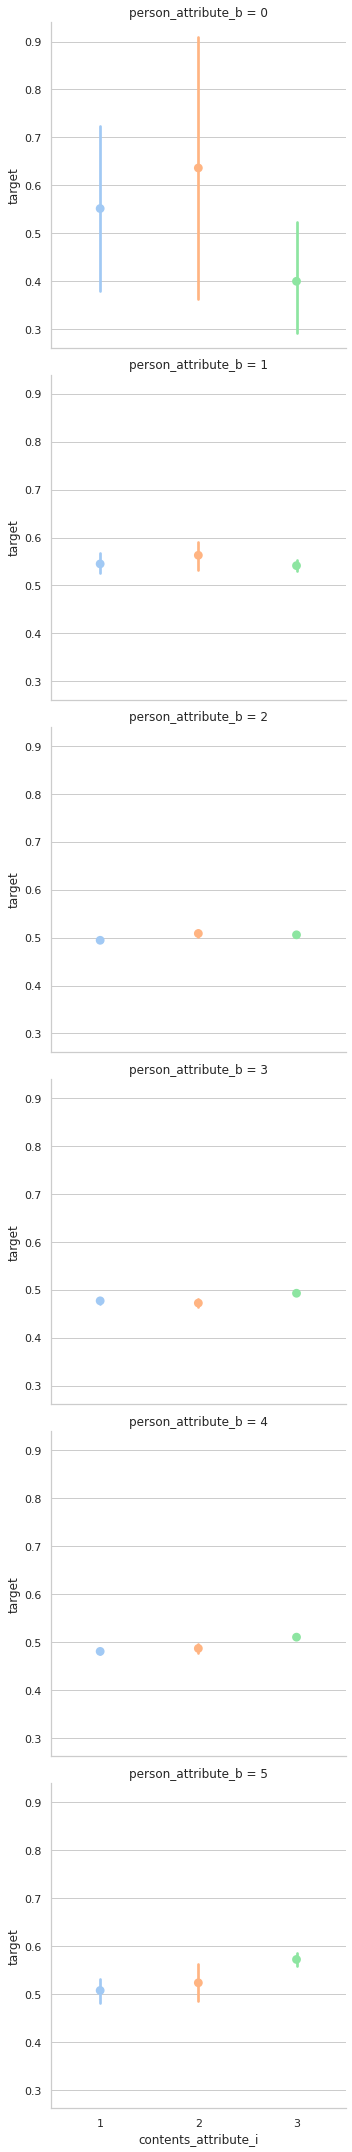

In [61]:
sns.catplot(x=x,y=y, kind='point',row='person_attribute_b', data=job_data, palette='pastel')

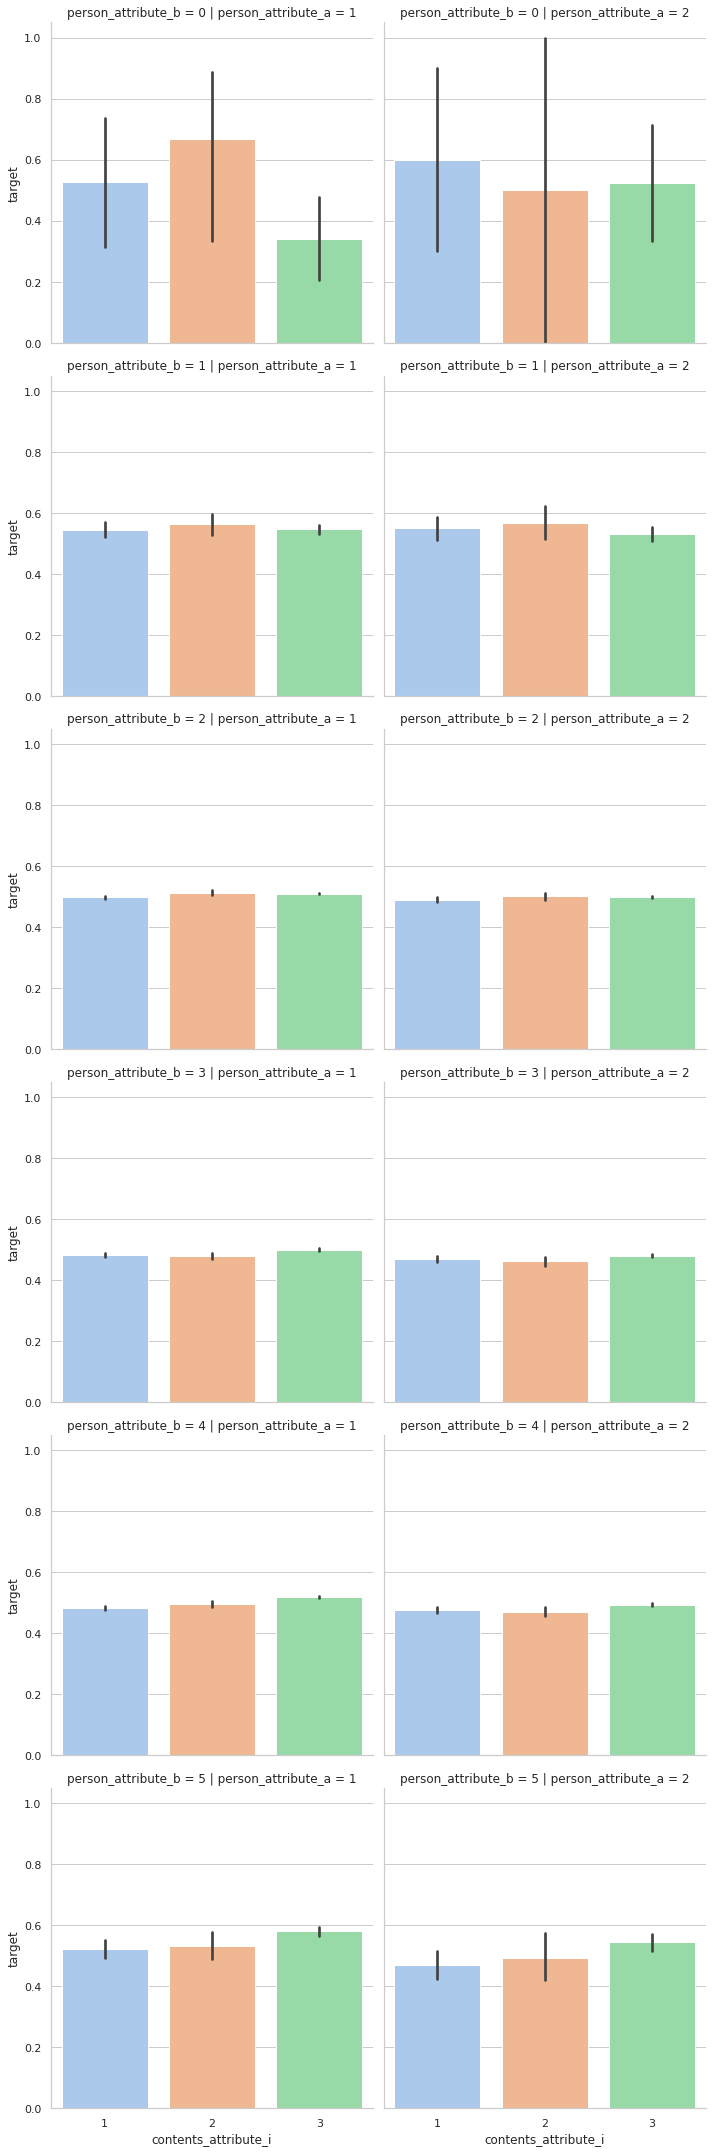

In [62]:
sns.catplot(x=x,y=y,kind='bar',col='person_attribute_a', row='person_attribute_b', data = job_data, palette='pastel')

* person_attribute_b = 0 이고 person_attribute_a = 1, contents_attribute_i = 2일때 target 확률이 가낭 큼

### contents_attribute_a
* 컨텐츠 속성 a 특징값
* Categorical Features(1,2,3)